In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle 
import sys

In [2]:
from FloaterParameters import FloaterParameters
from Environment import Environment
from Buoy import Buoy
from Mass import Mass
from Density import Density
from Area import Area
from GeneralisedCoordinateSystem import GeneralisedCoordinateSystem
from SystemMatrices import MatrixCalculation
from ComputeHydroCoefficients import CompHydroCoefficient
from plot_hydroD_results import plot_hydroD_results
from ReadWadamLis import ReadWadamLis
from CheckInterpolation import InterpolateParameters

Unable to import mpi4py. Parallel processing unavailable.
Unable to import petsc4py. Parallel processing unavailable.
Unable to import petsc4py. Parallel processing unavailable.


In [3]:
write = 0
plots = 1

In [4]:
parameters = [[55,60,80,100,120,130],
              [90,90,90,90,90]]
column_diameter = [12]

In [5]:
if write == 1:
    for ii in np.linspace(0,len(column_diameter)-1,len(column_diameter)).astype(int):
        for jj in np.linspace(0,len(parameters[0])-1,len(parameters[0])).astype(int):
            file_loc = r'C:\Users\Joar\Documents\1_Education\NTNU\pickle_files'
            file_name = "\sim_x_%f_y_%f_D%f" % (parameters[0][jj],parameters[1][jj],column_diameter[ii])
            file_path = file_loc + file_name
            floater = FloaterParameters(parameters[0][jj],parameters[1][jj], column_diameter[ii])
            rho = Density()
            area = CrossSectionalArea(floater)
            buoy = Buoy(floater, area, rho)
            mass = Mass(floater, area, buoy, rho)
            coord = GeneralisedCoordinateSystem(floater, area, mass, rho, buoy)
            genie = CompHydroCoefficient()
            genie.compute(coord, mass, floater)
            sim = ReadWadamLis(genie.HydroD_result)
            file_sim = open(file_path, 'wb') 
            pickle.dump(sim, file_sim)
            file_sim.close()

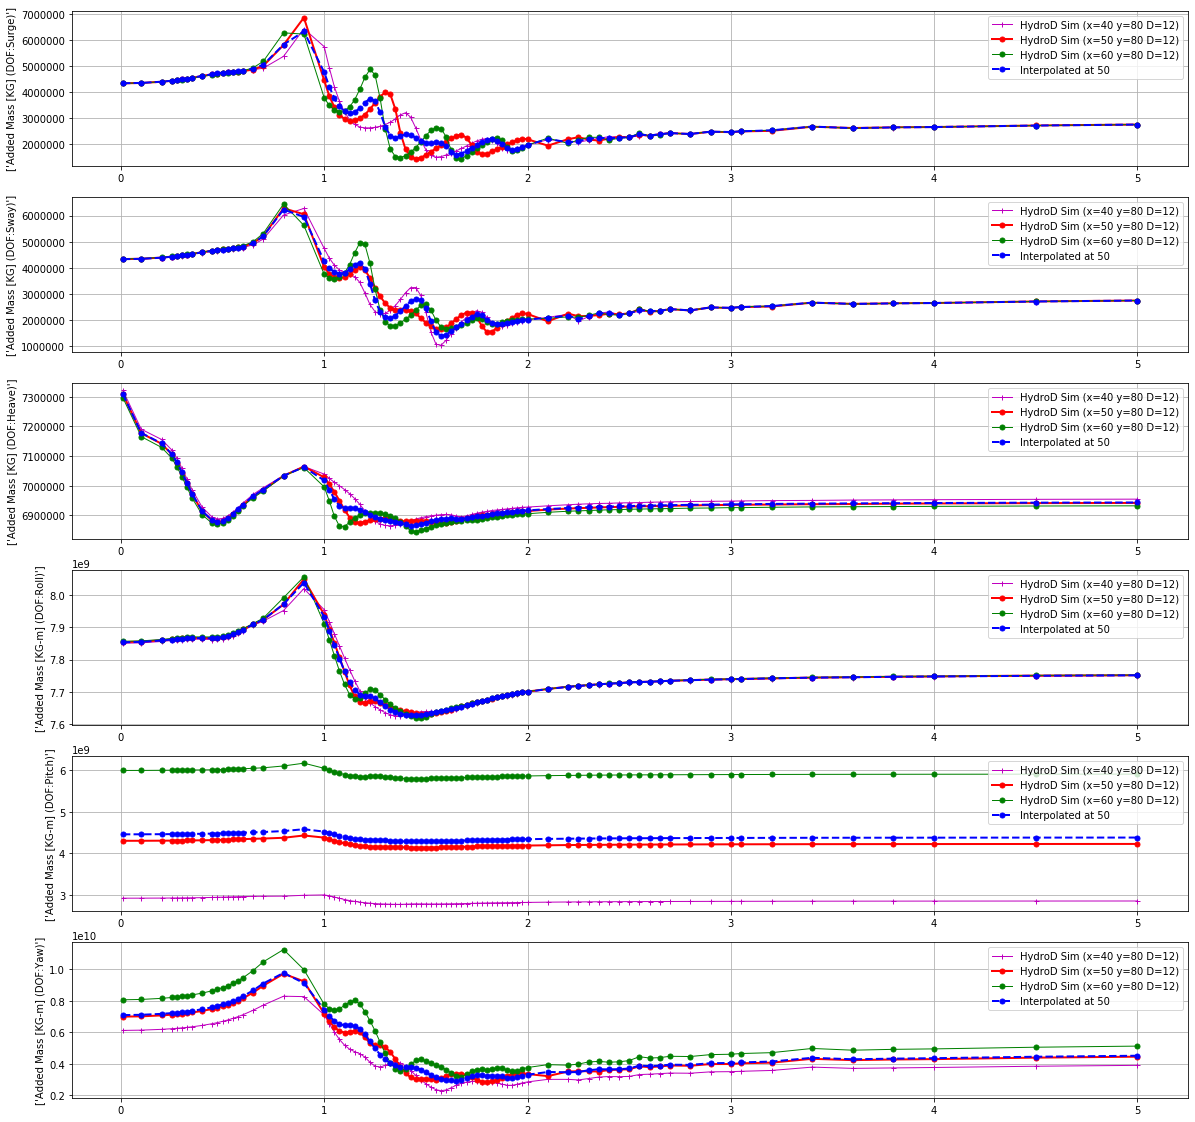

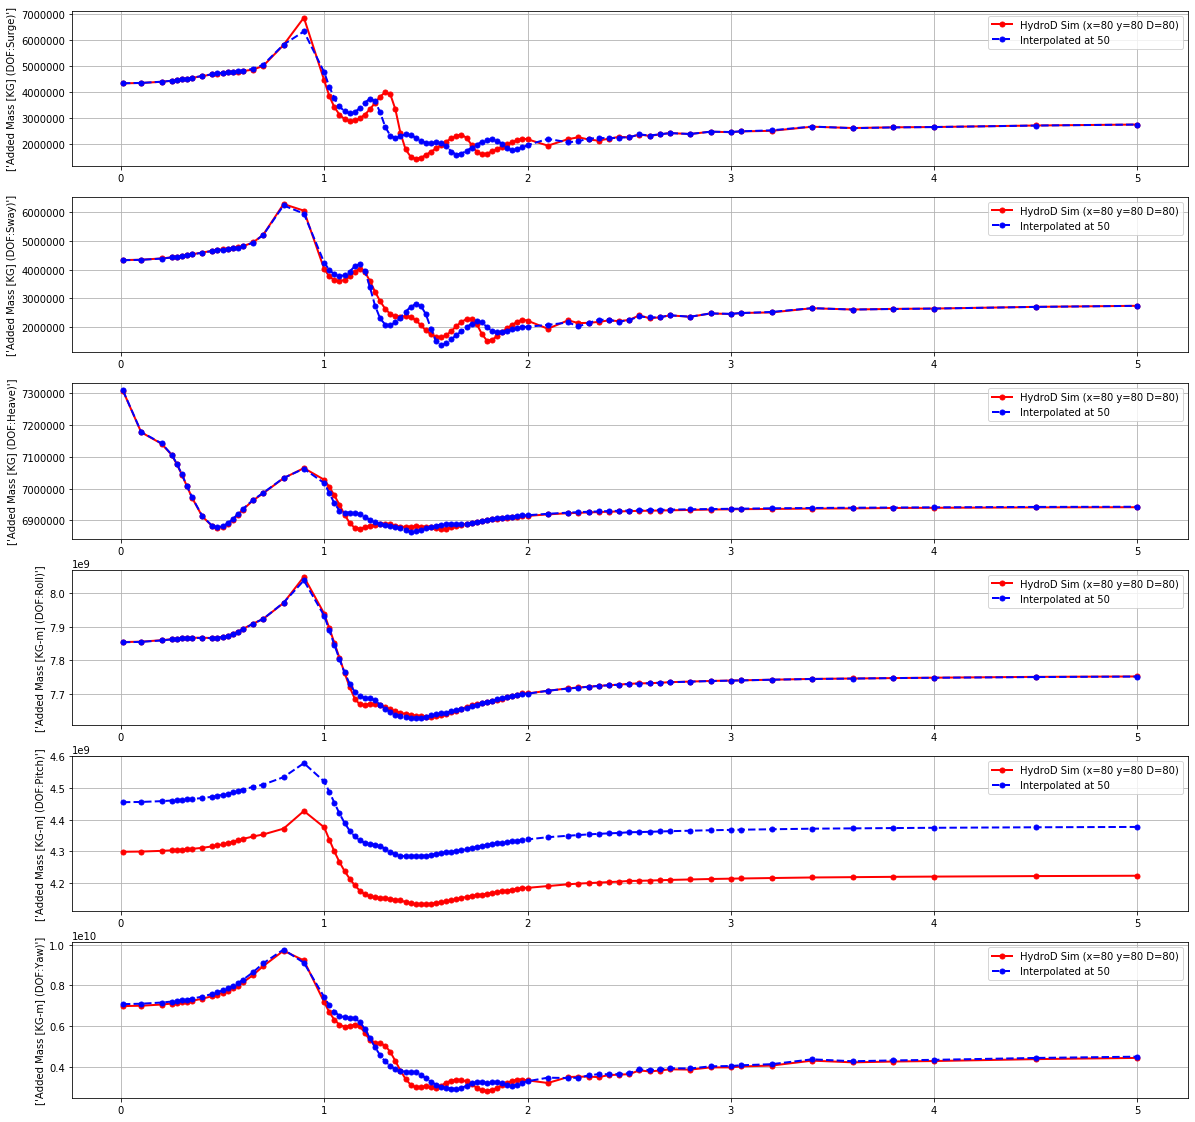

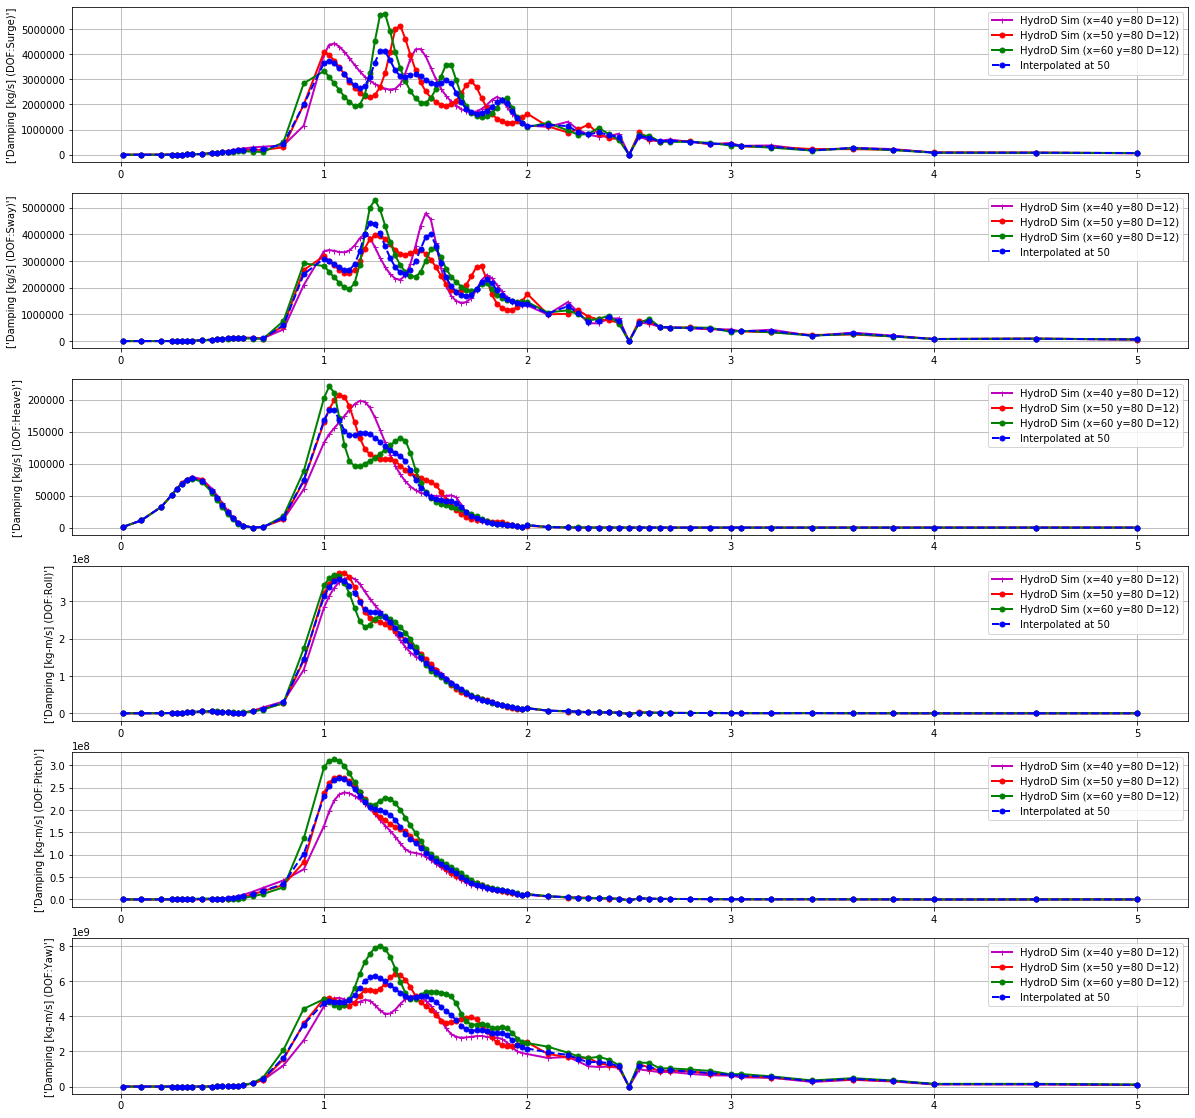

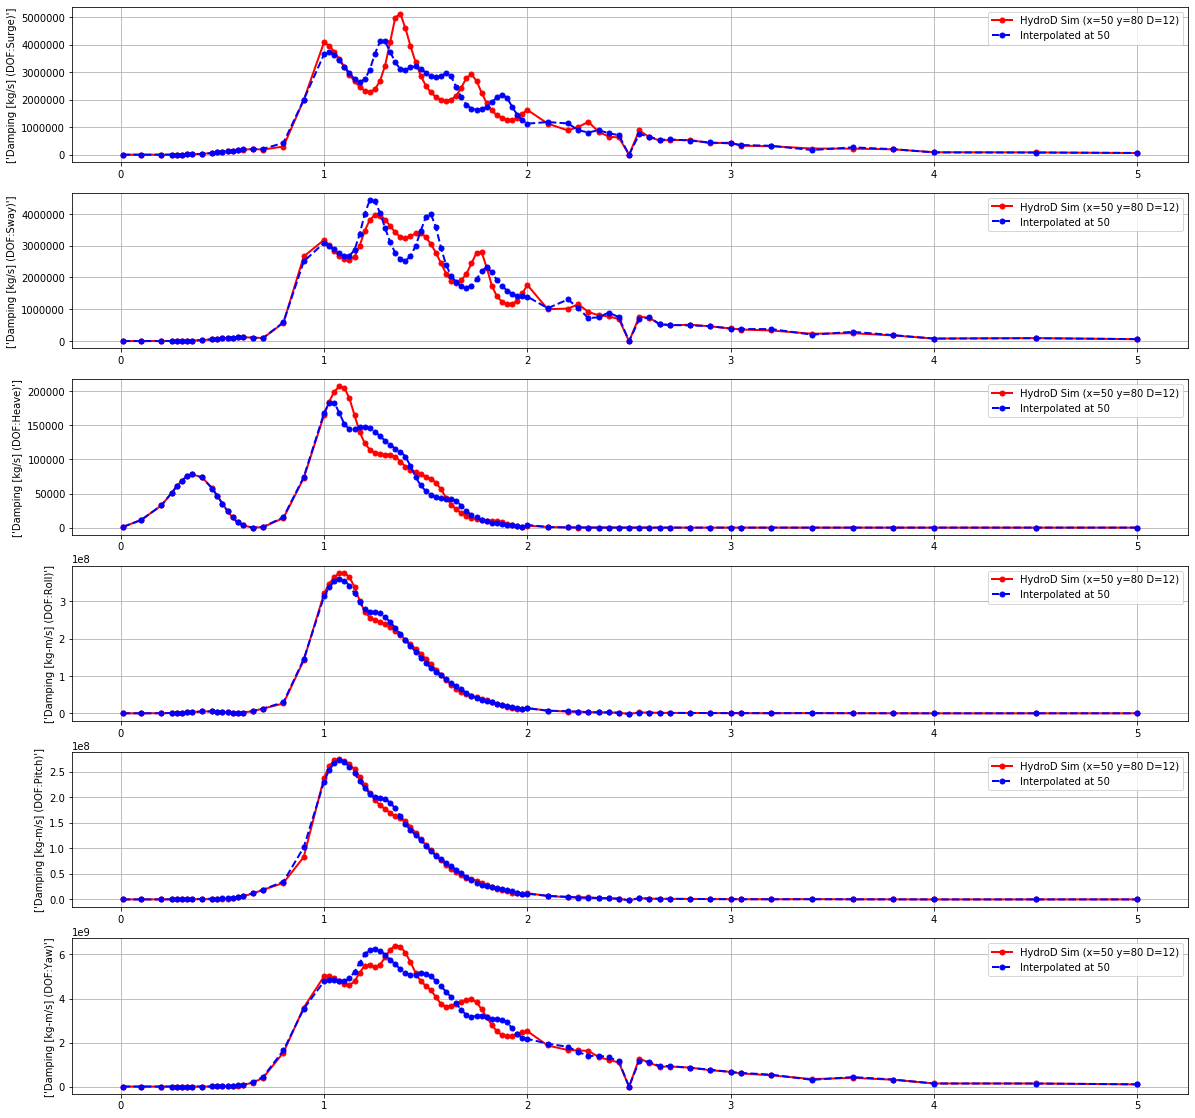

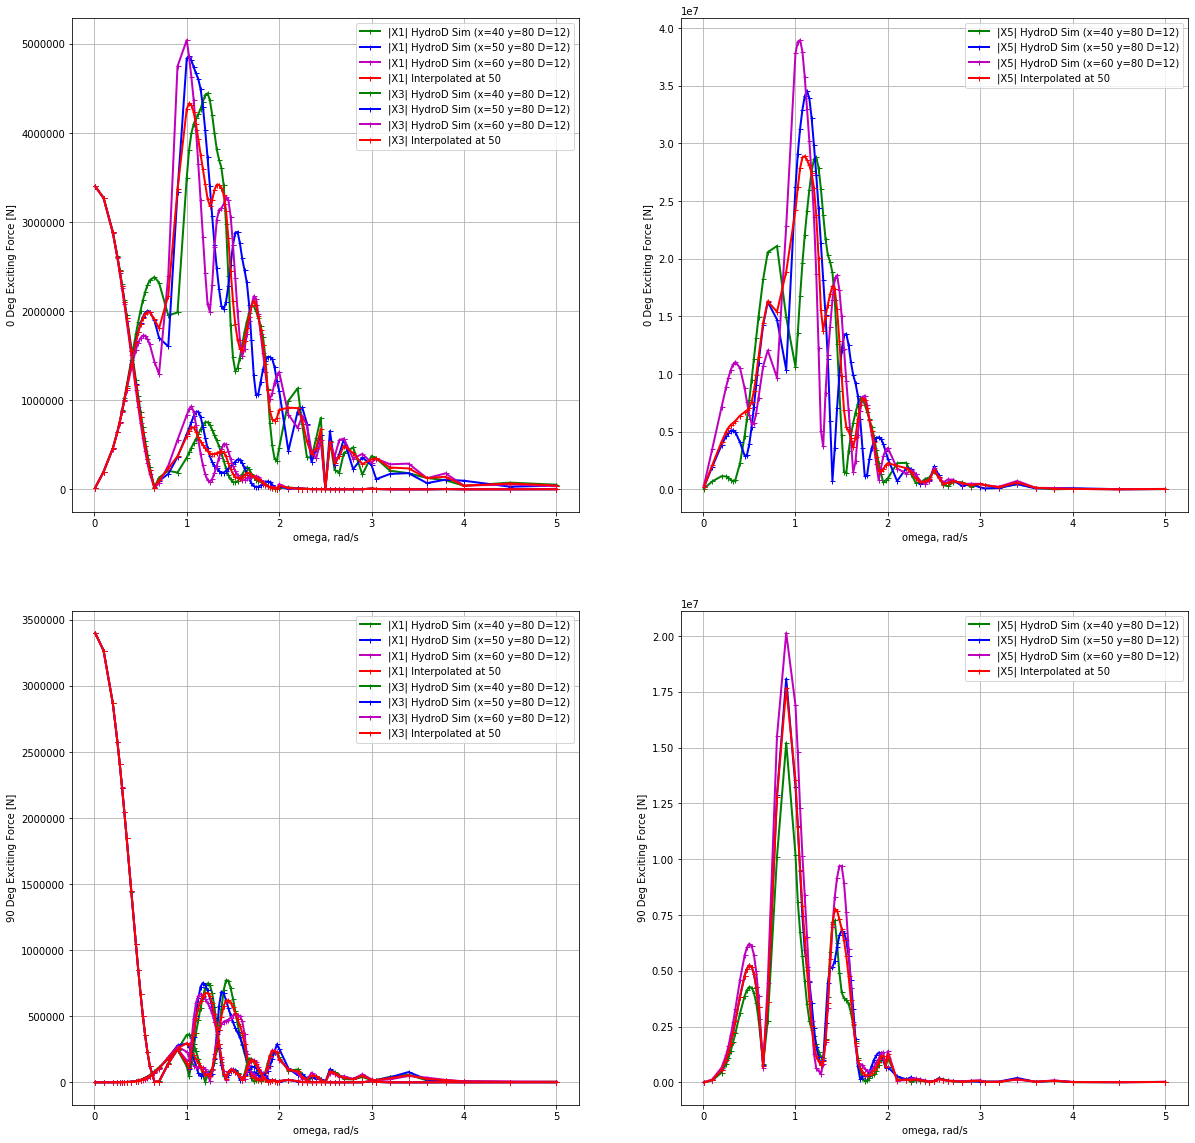

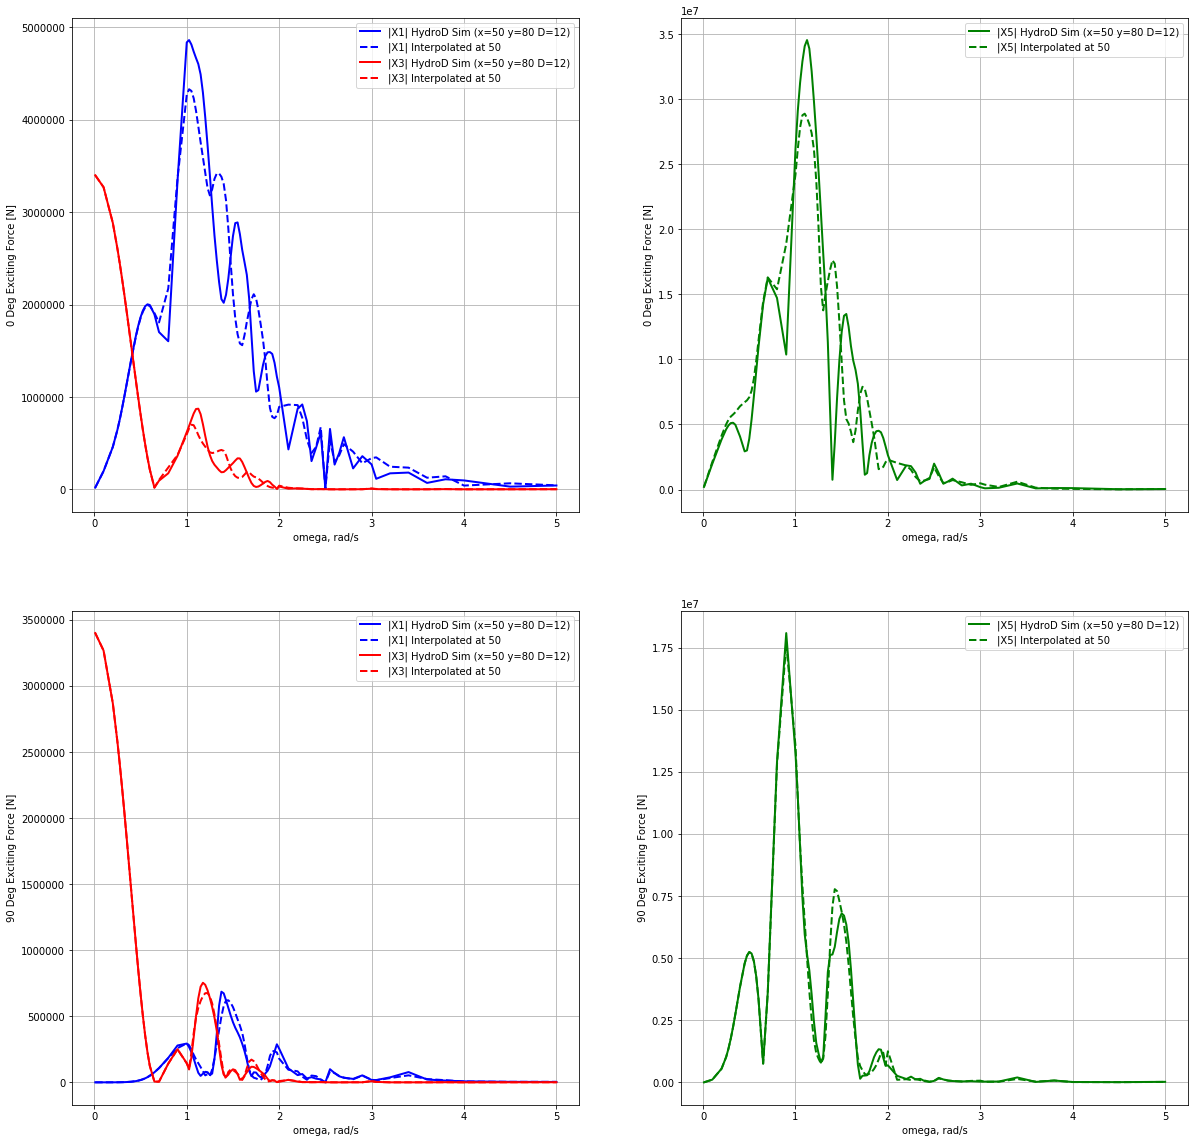

In [7]:
if plots == 1:
    pull =  np.array([[40,80,12],[50,80,12],[60,80,12]])
    interp_at = [0,50]
    inter = InterpolateParameters(pull, interp_at)
    inter._plot_interpolation(pull, interp_at)

In [7]:
if write == 0:
    file_loc = r'C:\Users\Joar\Documents\1_Education\NTNU\pickle_files'
    file_name = "\sim_x_%f_y_%f_D%f" % (pull[0,0],pull[0,1],pull[0,2])
    file_path = file_loc + file_name
    infile = open(file_path,'rb')
    sim1 = pickle.load(infile)
    infile.close()
    file_name = "\sim_x_%f_y_%f_D%f" % (pull[1,0],pull[1,1],pull[1,2])
    file_path = file_loc + file_name
    infile = open(file_path,'rb')
    sim2 = pickle.load(infile)
    infile.close()
    file_name = "\sim_x_%f_y_%f_D%f" % (pull[2,0],pull[2,1],pull[2,2])
    file_path = file_loc + file_name
    infile = open(file_path,'rb')
    sim3 = pickle.load(infile)
    infile.close()

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Joar\\Documents\\1_Education\\NTNU\\pickle_files\\sim_x_50.000000_y_70.000000_D12.000000'

In [ ]:
pull =   np.array([[50,70],[60,70],[70,70]])
interp_at = [60,0]
inter = InterpolateParameters(pull, interp_at)
inter._plot_interpolation(pull, interp_at)

In [ ]:
plots = plot_hydroD_results(sim1)

In [15]:
A = np.random.rand(6,6)

In [16]:
pd.DataFrame(A)

,0,1,2,3,4,5
0,0.416733,0.700296,0.779001,0.198465,0.399654,0.081061
1,0.623483,0.230681,0.922023,0.413047,0.582724,0.183587
2,0.679126,0.616691,0.014491,0.423243,0.245650,0.918874
3,0.339561,0.643733,0.897540,0.961960,0.528848,0.135782
4,0.370084,0.025876,0.578694,0.300131,0.536914,0.536434
5,0.179405,0.245354,0.994241,0.388639,0.134903,0.601529


In [17]:
pd.DataFrame(np.linalg.inv(A))

,0,1,2,3,4,5
0,-0.955543,2.977136,0.904711,-0.780703,-2.147005,-0.070968
1,1.539598,-1.348035,0.204941,0.238675,0.037559,-0.196484
2,0.193694,0.484042,-0.434865,-0.301651,-0.404385,0.919168
3,-1.524297,0.492598,0.260127,1.243192,-0.756549,0.051766
4,1.168064,-1.712887,-0.653780,0.419868,3.117175,-1.510564
5,0.059730,-1.072250,0.343907,-0.263294,1.083126,0.549811


## System properties

#### 1. Mass allocation

In [ ]:
coord.mass_df

#### 2. Buoyancy allocation

In [ ]:
coord.buoy_df

####  3. System centre of Mass

In [ ]:
coord.COM

####  4. System centre of Buoy

In [ ]:
coord.COB

####  5. Distance between COM and COB

In [ ]:
coord.COB[2] - coord.COM[2]

####  6. Radius of Gyration

In [ ]:
coord.RoG

##### To find classes within an object use dir(object) 

In [ ]:
dir(coord)

In [ ]:
mass.total

In [ ]:
coord.RoG

In [ ]:
coord.COM

In [ ]:
coord.rog_df

In [ ]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [ ]:
plt.rcParams["figure.figsize"] = (20,20)
styles = [['-b','-g','-r','-b','-g','-r'],
          ['--b','--g','--r','--b','--g','--r'],
          [':b',':g',':r',':b',':g',':r'],
          ['-.b','-.g','-.r','-.b','-.g','-.r'],
          ['bo--','go--','ro--','bo--','go--','ro--'],
          ['b+--','g+--','r+--','b+--','g+--','r+--']]
legend_A = [['A11','A12','A13','A14','A15','A16'],
         ['A21','A22','A23','A24','A25','A26'],
         ['A31','A32','A33','A34','A35','A36'],
         ['A41','A42','A43','A44','A45','A46'],
         ['A51','A52','A53','A54','A55','A56'],
         ['A61','A62','A63','A64','A65','A66']]

In [ ]:
legend_D = [['D11','D12','D13','D14','D15','D16'],
         ['D21','D22','D23','D24','D25','D26'],
         ['D31','D32','D33','D34','D35','D36'],
         ['D41','D42','D43','D44','D45','D46'],
         ['D51','D52','D53','D54','D55','D56'],
         ['D61','D62','D63','D64','D65','D66']]

In [ ]:
fig, axs = plt.subplots(2, 2)
for ii in np.linspace(0,2,3).astype(int):
    for jj in np.linspace(0,2,3).astype(int):
        axs[0, 0].plot(sim.wave_disc[:,4],sim.ADDEDMASS[:,ii,jj],styles[ii][jj], label=legend_A[ii][jj], linewidth=2, markersize=5)
axs[0,0].legend(loc="upper right")
axs[0,0].set(ylabel='Added Mass [kg]')
axs[0,0].grid(b=True, which='both', axis = 'both')

for ii in np.linspace(3,5,3).astype(int):
    for jj in np.linspace(0,2,3).astype(int):
        axs[1, 0].plot(sim.wave_disc[:,4],sim.ADDEDMASS[:,ii,jj],styles[ii][jj], label=legend_A[ii][jj], linewidth=2, markersize=5)        
axs[1,0].legend(loc="upper right")
axs[1,0].set(ylabel='Added Mass [kg-m^2]')
axs[1,0].grid(b=True, which='both', axis = 'both')
        
for ii in np.linspace(0,2,3).astype(int):
    for jj in np.linspace(3,5,3).astype(int):
        axs[1, 1].plot(sim.wave_disc[:,4],sim.ADDEDMASS[:,ii,jj],styles[ii][jj], label=legend_A[ii][jj], linewidth=2, markersize=5)            
axs[1,1].legend(loc="upper right")        
axs[1,1].set(xlabel='omega, rad/s', ylabel='Added Mass [kg-m]')
axs[1,1].grid(b=True, which='both', axis = 'both')
        
for ii in np.linspace(3,5,3).astype(int):
    for jj in np.linspace(3,5,3).astype(int):
        axs[0, 1].plot(sim.wave_disc[:,4],sim.ADDEDMASS[:,ii,jj],styles[ii][jj], label=legend_A[ii][jj], linewidth=2, markersize=5)  
axs[0,1].legend(loc="upper right")        
axs[0,1].set(xlabel='omega, rad/s', ylabel='Added Mass [kg-m]')
axs[0,1].grid(b=True, which='both', axis = 'both')

In [ ]:
fig, axs = plt.subplots(2, 2)
for ii in np.linspace(0,2,3).astype(int):
    for jj in np.linspace(0,2,3).astype(int):
        axs[0, 0].plot(sim.wave_disc[:,4],sim.DAMPING[:,ii,jj],styles[ii][jj], label=legend_D[ii][jj], linewidth=2, markersize=2)
axs[0,0].legend(loc="upper right")
axs[0,0].set(ylabel='Damping [kg/s]')
axs[0,0].grid(b=True, which='both', axis = 'both')
        
for ii in np.linspace(0,2,3).astype(int):
    for jj in np.linspace(3,5,3).astype(int):
        axs[1, 1].plot(sim.wave_disc[:,4],sim.DAMPING[:,ii,jj],styles[ii][jj], label=legend_D[ii][jj], linewidth=2, markersize=2)        
axs[1,1].legend(loc="upper right")
axs[1,1].set(ylabel='Damping [kg-m/s^2]')
axs[1,1].grid(b=True, which='both', axis = 'both')
        
for ii in np.linspace(3,5,3).astype(int):
    for jj in np.linspace(0,2,3).astype(int):
        axs[1, 0].plot(sim.wave_disc[:,4],sim.DAMPING[:,ii,jj],styles[ii][jj], label=legend_D[ii][jj], linewidth=2, markersize=2)            
axs[1,0].legend(loc="upper right") 
axs[1,0].set(xlabel='omega, rad/s', ylabel='Damping [kg-m/s]')
axs[1,0].grid(b=True, which='both', axis = 'both')
    
        
for ii in np.linspace(3,5,3).astype(int):
    for jj in np.linspace(3,5,3).astype(int):
        axs[0, 1].plot(sim.wave_disc[:,4],sim.DAMPING[:,ii,jj],styles[ii][jj], label=legend_D[ii][jj], linewidth=2, markersize=2)            
axs[0,1].legend(loc="upper right")    
axs[0,1].set(xlabel='omega, rad/s', ylabel='Damping [kg-m/s]')
axs[0,1].grid(b=True, which='both', axis = 'both')


In [ ]:
legend_F = ['|$X_1$|','|$X_2$|','|$X_3$|','|$X_4$|','|$X_5$|','|$X_6$|']
legend_T = [r'$\theta_1$',r'$\theta_2$',r'$\theta_3$',r'$\theta_4$',r'$\theta_5$',r'$\theta_6$']

In [ ]:
fig, axs = plt.subplots(2,2)
for jj in np.linspace(0,2,3).astype(int):
        axs[0,0].plot(sim.wave_disc[:,4],sim.WAVEEX[0,:,jj,2], label=legend_F[jj], linewidth=2, markersize=2)            
        axs[0,0].legend(loc="upper right") 
        axs[0,0].set(xlabel='omega, rad/s', ylabel='0 Deg Exciting Force [N]')
        axs[0,0].grid(b=True, which='both', axis = 'both')

for jj in np.linspace(3,5,3).astype(int):
        axs[0,1].plot(sim.wave_disc[:,4],sim.WAVEEX[0,:,jj,2], label=legend_T[jj], linewidth=2, markersize=2)            
        axs[0,1].legend(loc="upper right") 
        axs[0,1].set(xlabel='omega, rad/s', ylabel='0 Deg Exciting Force [N]')
        axs[0,1].grid(b=True, which='both', axis = 'both')
        
for jj in np.linspace(0,2,3).astype(int):
        axs[1,0].plot(sim.wave_disc[:,4],sim.WAVEEX[1,:,jj,2], label=legend_F[jj], linewidth=2, markersize=2)            
        axs[1,0].legend(loc="upper right") 
        axs[1,0].set(xlabel='omega, rad/s', ylabel='90 Deg Exciting Force [N]')
        axs[1,0].grid(b=True, which='both', axis = 'both')

for jj in np.linspace(3,5,3).astype(int):
        axs[1,1].plot(sim.wave_disc[:,4],sim.WAVEEX[1,:,jj,2], label=legend_T[jj], linewidth=2, markersize=2)            
        axs[1,1].legend(loc="upper right") 
        axs[1,1].set(xlabel='omega, rad/s', ylabel='90 Deg Exciting Force [N]')
        axs[1,1].grid(b=True, which='both', axis = 'both')
        

In [ ]:
M = 6.10537E+06

In [ ]:
r = 5.57991E+01

In [ ]:
M*np.square(r)